In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys

In [2]:

from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [4]:
print('학습셋 이미지 수: %d개' %(x_train.shape[0]))
print('테스트트셋 이미지 수: %d개' %(x_test.shape[0]))

학습셋 이미지 수: 60000개
테스트트셋 이미지 수: 10000개


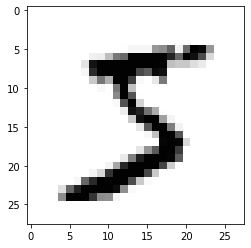

In [5]:
plt.imshow(x_train[0], cmap='Greys')
plt.show()

In [6]:
#이미지 생성 원리 

for x in x_train[0]:
    for i in x:
        sys.stdout.write('%-3s' %i)
    sys.stdout.write('\n')

0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  3  18 18 18 12613617526 1662552471270  0  0  0  
0  0  0  0  0  0  0  0  30 36 94 15417025325325325325322517225324219564 0  0  0  0  
0  0  0  0  0  0  0  49 23825325325325325325325325325193 82 82 56 39 0  0  0  0  0  
0  0  0  0  0  0  0  18 2192532532532532531981822472410  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  80 15610725325320511 0  43 1540  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  14 1  15425390 0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  1392531902  0  0  0  0  0  0  0 

In [7]:
#차원 변환 과정 실습

x_train=x_train.reshape(x_train.shape[0], 784)
x_train=x_train.astype('float64')
x_train=x_train/255 #정규화(명도를 0~1 사이로 나타내기 위함함)

x_test =x_test.reshape(x_test.shape[0],784).astype('float64')/255


In [8]:
#클래스 값 확인
print('class: %d ' %(y_train[0]))

class: 5 


In [9]:
#이진화(binary) > 원핫인코딩

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

print(y_train[0])
print()
print(y_test[0])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]

[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


In [27]:
# 딥러닝 기본 프레ㅐ임 만들기

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

In [14]:
#mnist 데이터 불러오기기
#(x_train, y_train), (x_test, y_test) = mnist.load_data()

#차원 변화 후 학습용 테스트용 분리리
#x_train=x_train.reshape(x_train.shape[0], 784).astype('float64')/255
#x_test =x_test.reshape(x_test.shape[0],784).astype('float64')/255

#y_train = to_categorical(y_train, 10)
#y_test = to_categorical(y_test, 10)

#모델 구조 설정 
#model=Sequential()
#model.add(Dense(512, input_dim=784, activation='relu'))
#model.add(Dense(10, activation='softmax'))
#model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [33]:
#mnist 데이터 불러오기기
(x_train, y_train), (x_test, y_test) = mnist.load_data()

#차원 변화 후 학습용 테스트용 분리리
x_train=x_train.reshape(x_train.shape[0], 28, 28, 1).astype('float64')/255
x_test =x_test.reshape(x_test.shape[0],28, 28, 1).astype('float64')/255

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [34]:
#컨볼루션 신경망 설정

model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), input_shape=(28,28,1), activation='relu' ))
model.add(Conv2D(64,(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 conv2d_4 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 12, 12, 64)       0         
 2D)                                                             
                                                                 
 dropout_2 (Dropout)         (None, 12, 12, 64)        0         
                                                                 
 flatten_1 (Flatten)         (None, 9216)              0         
                                                                 
 dense_4 (Dense)             (None, 128)               1179776   
                                                      

In [35]:
#모델 실행 환경 설정

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

#모델 최적화 구역 설정정
MODEL_DIR='/content/drive/MyDrive/sesac_ai/code/deeplearning/model/'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)

modelpath = '/content/drive/MyDrive/sesac_ai/code/deeplearning/model/mnist.hdf5'
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verboss=1, save_best_only=True)
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10)

In [ ]:
#모델실행

history=model.fit(x_train, y_train, validation_split=0.25, epochs=30, batch_size=200,
                  verbose=0, callbacks=[early_stopping_callback, checkpointer])

#테스트 정확도 출력
print('\n test acc: %.4f' %(model.evaluate(x_test, y_test)[1]))      

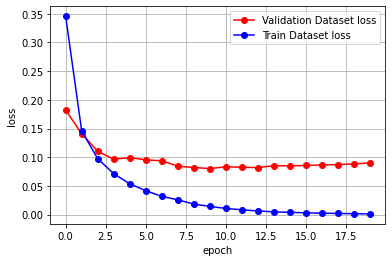

In [25]:
#학습용 데이터 셋/검증 셋 오차 저장

y_vloss=history.history['val_loss']
y_loss=history.history['loss']

#그래프로 표현
x_len=np.arange(len(y_loss))

plt.plot(x_len, y_vloss, marker='o', c='red', label='Validation Dataset loss')
plt.plot(x_len, y_loss, marker='o', c='blue', label='Train Dataset loss')

plt.legend(loc='best')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()